## Monte Carlo Integration Using Uniform Sampling

### **Objective**
This code estimates the expectation value of $E$ for a truncated exponential distribution:
$$
\langle E \rangle = \int_0^{E_{\max}} E p(E) dE
$$
where the probability density function (PDF) is given by:
$$
p(E) = \frac{e^{-\beta E}}{Z}, \quad 0 \leq E \leq E_{\max},
$$
with the normalization constant:
$$
Z = \frac{1 - e^{-\beta E_{\max}}}{\beta}.
$$

### **Methodology**
1. **Uniform Sampling:**
   - The variable $E$ is sampled uniformly from the range $[0, E_{\max}]$.

2. **Monte Carlo Integral Approximation:**
   - Using the mean-value Monte Carlo method, we approximate:
     $$
     I \approx (b - a) \frac{1}{N} \sum_{i=1}^{N} g(E_i),
     $$
     where $g(E) = E p(E)$, and $N$ is the number of samples.

3. **Error Estimation:**
   - The uncertainty in the estimate is computed using:
     $$
     \sigma \approx (b-a) \sqrt{\frac{\langle g^2 \rangle - \langle g \rangle^2}{N}}.
     $$

### **Results**
- The Monte Carlo estimate of $\langle E \rangle$ is plotted against the number of samples $N$.
- A shaded region shows the $\pm1\sigma$ confidence interval.
- The true analytical expectation value is plotted as a red dashed line for comparison.
- The x-axis is logarithmic to highlight the convergence behavior.


Analytical expectation value: 0.9995459800899031


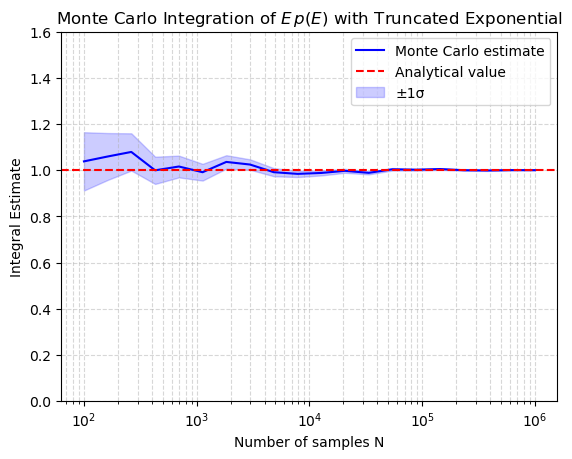

0.12627284672407507


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# User-defined parameters
beta = 1.0
E_max = 10.0

# Correct analytical expectation value formula
E_analytical = 1/beta - (E_max * np.exp(-beta * E_max))/(1 - np.exp(-beta * E_max))
print(f"Analytical expectation value: {E_analytical}")

# Create a PCG64-based random number generator with a fixed seed
rng = np.random.default_rng(42)

# Normalization factor for the truncated exponential distribution
Z = (1.0 - np.exp(-beta * E_max)) / beta

# Define the function we want to integrate: g(E) = E * p(E)
def g(E):
    return E * np.exp(-beta * E) / Z

# Integration limits for uniform sampling
a = 0.0
b = E_max

# Define a range of sample sizes (logarithmically spaced)
N_values = np.logspace(2, 6, num=20, dtype=int)

I_estimates = []
errors = []

for N in N_values:
    # Sample points uniformly in [a, b]
    E_samples = a + (b - a) * rng.random(N)
    
    # Evaluate g(E) = E * p(E)
    gvals = g(E_samples)
    
    # Compute sums of g and g^2
    g_sum = np.sum(gvals)
    g2_sum = np.sum(gvals**2)
    
    # Compute means
    g_mean = g_sum / N
    g2_mean = g2_sum / N
    
    # Monte Carlo estimate of the integral
    I_est = (b - a) * g_mean
    
    # Error estimate (standard error)
    variance_est = g2_mean - g_mean**2
    sigma_est = (b - a) * np.sqrt(variance_est / N)
    
    I_estimates.append(I_est)
    errors.append(sigma_est)

# Convert to arrays for convenience
I_estimates = np.array(I_estimates)
errors = np.array(errors)

# Plot the Monte Carlo estimates
plt.plot(N_values, I_estimates, 'b-', label="Monte Carlo estimate")
plt.axhline(y=E_analytical, color='r', linestyle='--', label="Analytical value")

# Plot the shaded error region (±1σ)
plt.fill_between(
    N_values,
    I_estimates - errors,
    I_estimates + errors,
    color='blue',
    alpha=0.2,
    label="±1σ"
)

# Use a log-scale for the x-axis
plt.xscale('log')

# Add dashed grid lines in both major and minor ticks
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.ylim(0.0, 1.6)

plt.xlabel("Number of samples N")
plt.ylabel("Integral Estimate")
plt.title("Monte Carlo Integration of $E\,p(E)$ with Truncated Exponential")
plt.legend()
plt.show()

print(errors[0])

## Monte Carlo Estimation Using Sampling from $p(E)$

### **Objective**
This code estimates the expectation value $\langle E \rangle$ by directly sampling from the truncated exponential distribution $p(E)$:
$$
\langle E \rangle = \int_0^{E_{\max}} E p(E) dE.
$$

### **Methodology**
1. **Sampling from $p(E)$ Using the Inverse Transform Method:**
   - Instead of uniform sampling, we generate samples $E$ directly from $p(E)$ using the inverse transform method.
   - Given a uniform random variable $x \sim U(0,1)$, we transform it as:
     $$
     E = -\frac{1}{\beta} \ln(1 - x \beta Z),
     $$
     to obtain values distributed according to $p(E)$.

2. **Monte Carlo Estimate:**
   - Since the samples are drawn directly from $p(E)$, the expectation value is simply the sample mean:
     $$
     \langle E \rangle \approx \frac{1}{N} \sum_{i=1}^{N} E_i.
     $$

3. **Error Estimation:**
   - The uncertainty in the estimate is given by:
     $$
     \sigma \approx \sqrt{\frac{\langle E^2 \rangle - \langle E \rangle^2}{N}}.
     $$

### **Results**
- The Monte Carlo estimate of $\langle E \rangle$ is plotted as a function of the number of samples $N$.
- A shaded region represents the $\pm1\sigma$ confidence interval.
- The analytical expectation value is plotted as a red dashed line.
- The x-axis is logarithmic to illustrate the convergence behavior.
- This method converges faster than uniform sampling due to better efficiency.


Analytical expectation value: 0.9995459800899031


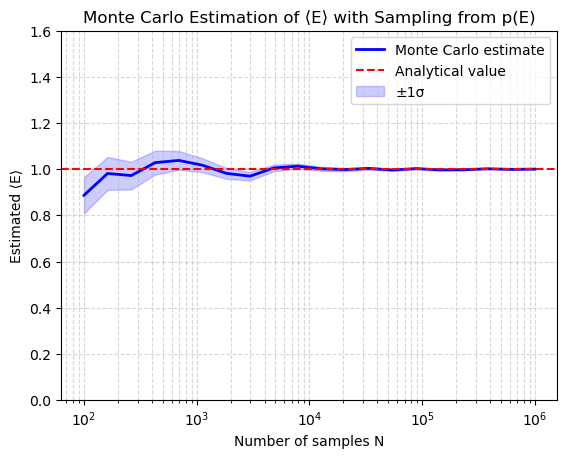

0.07857248261082128


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# User-defined parameters for the truncated exponential distribution
beta = 1.0      # parameter β (can be changed to any positive value)
E_max = 10.0    # maximum energy E_max

# Correct analytical expectation value formula
E_analytical = 1/beta - (E_max * np.exp(-beta * E_max))/(1 - np.exp(-beta * E_max))
print(f"Analytical expectation value: {E_analytical}")

# Normalization factor for the truncated exponential distribution
Z = (1 - np.exp(-beta * E_max)) / beta

# Create a PCG64-based random number generator with a fixed seed
rng = np.random.default_rng(42)

# Function to generate samples from p(E) using inverse transform sampling
def sample_E(N):
    # Generate N uniform random numbers in [0,1]
    x_samples = rng.random(N)
    # Inverse transform sampling: E = - (1/β) * ln(1 - x * βZ)
    return - (1 / beta) * np.log(1 - x_samples * beta * Z)

# Define a range of sample sizes (logarithmically spaced)
N_values = np.logspace(2, 6, num=20, dtype=int)

E_estimates = []
errors = []

for N in N_values:
    # Sample N values of E from the truncated exponential distribution p(E)
    E_samples = sample_E(N)
    
    # Compute the Monte Carlo estimate for ⟨E⟩ = ∫ E p(E)dE, which is just the sample mean
    E_mean = np.sum(E_samples) / N
    # Compute the second moment
    E2_mean = np.sum(E_samples**2) / N
    # Variance and standard error of the mean
    variance = E2_mean - E_mean**2
    sigma = np.sqrt(variance / N)
    
    E_estimates.append(E_mean)
    errors.append(sigma)

# Convert to numpy arrays for plotting
E_estimates = np.array(E_estimates)
errors = np.array(errors)

# Plot the Monte Carlo estimates vs. sample size with a shaded ±1σ region
plt.plot(N_values, E_estimates, 'b-', linewidth=2, label="Monte Carlo estimate")
plt.axhline(y=E_analytical, color='r', linestyle='--', label="Analytical value")

plt.fill_between(
    N_values,
    E_estimates - errors,
    E_estimates + errors,
    color='blue',
    alpha=0.2,
    label="±1σ"
)

plt.ylim(0.0, 1.6)

plt.xscale('log')
plt.xlabel("Number of samples N")
plt.ylabel("Estimated ⟨E⟩")
plt.title("Monte Carlo Estimation of ⟨E⟩ with Sampling from p(E)")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

print(errors[0])